# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**


- **status**: Checking account status with the bank (categorical).
- **duration**: Credit duration in months (quantitative).
- **credit_history**: Compliance with previous credit contracts (categorical).
- **purpose**: Reason for requesting the loan (categorical).
- **amount**: Loan amount in Deutsche Marks (quantitative).
- **savings**: Savings account balance (categorical).
- **employment_duration**: Length of employment (ordinal).
- **installment_rate**: Monthly installment as a percentage of income (ordinal).
- **personal_status_sex**: Combined marital status and sex (categorical).
- **other_debtors**: Other debtors or guarantors (categorical).
- **present_residence**: Years living at current residence (ordinal).
- **property**: Most valuable property (ordinal).
- **age**: Age in years (quantitative).
- **other_installment_plans**: Installment plans with other banks (categorical).
- **housing**: Type of housing (categorical).
- **number_credits**: Number of current and past loans (ordinal).
- **job**: Job quality (ordinal).
- **people_liable**: Number of dependents (binary).
- **telephone**: Telephone ownership (binary).
- **foreign_worker**: Foreign worker status (binary).
- **credit_risk**: Target variable—creditworthiness (good/bad, binary).


In [15]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [16]:
# Import the `yaml`
import yaml
with open(r'../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

## **Manipulación y preparación de datos**

In [17]:
# Load the dataset.
#data = pd.read_csv(r'./data/raw/SouthGermanCredit.asc', sep=' ')
data = pd.read_csv(config['data_load']['filepath'], sep=' ')
# Display the first 5 rows
data.head(5)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [18]:
# Rename the columns of the dataset
data.columns=["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors",
            "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker",
            "credit_risk"]
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [19]:
#Review tehe null values
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [20]:
# Extract numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print('Number of Numerical Feature :', len(numerical_feature))

Number of Numerical Feature : 21


In [21]:
# Loop through each numerical feature and print out the feature name
for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is status and number of categories are 4
The feature is duration and number of categories are 33
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is amount and number of categories are 923
The feature is savings and number of categories are 5
The feature is employment_duration and number of categories are 5
The feature is installment_rate and number of categories are 4
The feature is personal_status_sex and number of categories are 4
The feature is other_debtors and number of categories are 3
The feature is present_residence and number of categories are 4
The feature is property and number of categories are 4
The feature is age and number of categories are 53
The feature is other_installment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is number_credits and number of categories are 4
The feature is job and number of categories are 4
The fe

In [22]:
# Identifying discrete variables: 
discrete_variable=[feature for feature in numerical_feature if len(data[feature].unique())<9]
print('Discrete Variable Feature : {}'.format(len(discrete_variable)))

Discrete Variable Feature : 17


In [23]:
# Identifying continuous variables:
continous_variable=[feature for feature in numerical_feature if feature not in data[discrete_variable]]


print('Continous Variable Feature : {}'.format(len(continous_variable)))

Continous Variable Feature : 4


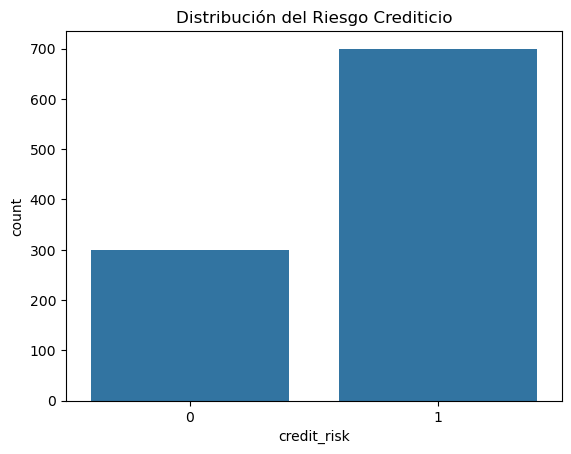

In [24]:
# Plotting the distribution of credit risk
sns.countplot(x=data['credit_risk'])
plt.title("Distribución del Riesgo Crediticio")
plt.show()

<Axes: xlabel='credit_risk', ylabel='count'>

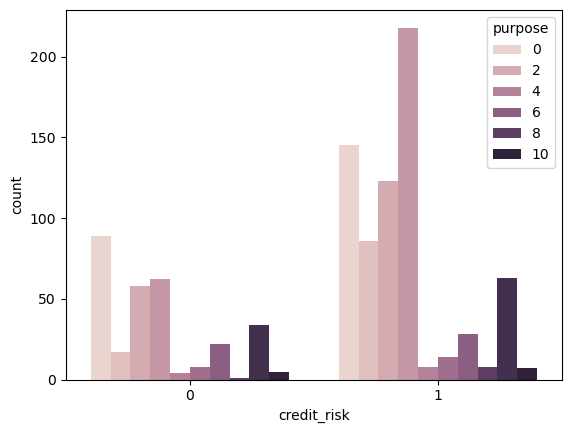

In [25]:
# Relationship between credit risk and loan purpose
sns.countplot(x='credit_risk',hue='purpose',data=data)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

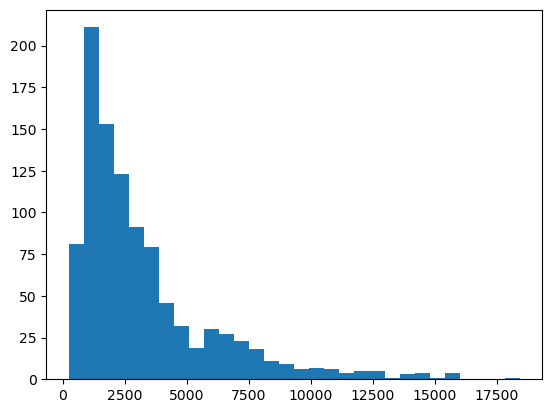

In [26]:
# Histogram for the 'amount' column in the data
plt.hist(x='amount',bins=30,data=data)

In [27]:
# Filter the dataset to show only rows where credit risk is 0 (bad credit risk).
data[data['credit_risk']==0]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


Text(0.5, 1.0, 'Histograma de montos de préstamos incobrables')

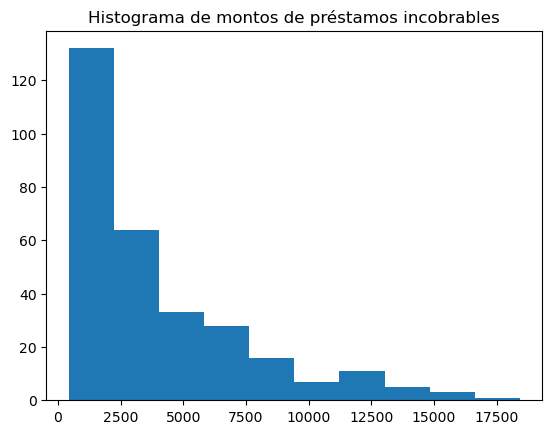

In [28]:
# Distribution of loan amounts for the bad credit risk group (credit_risk = 0).
plt.hist(data=data[data['credit_risk']==0],x='amount')
plt.title('Histograma de montos de préstamos incobrables')

In [29]:
# Calculates the maximum loan amount for customers who have a bad credit risk (credit_risk = 0).
max(data[data['credit_risk']==0]['amount'])

18424

In [30]:
# Setting the figure size and background color
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

<Figure size 2500x2500 with 0 Axes>

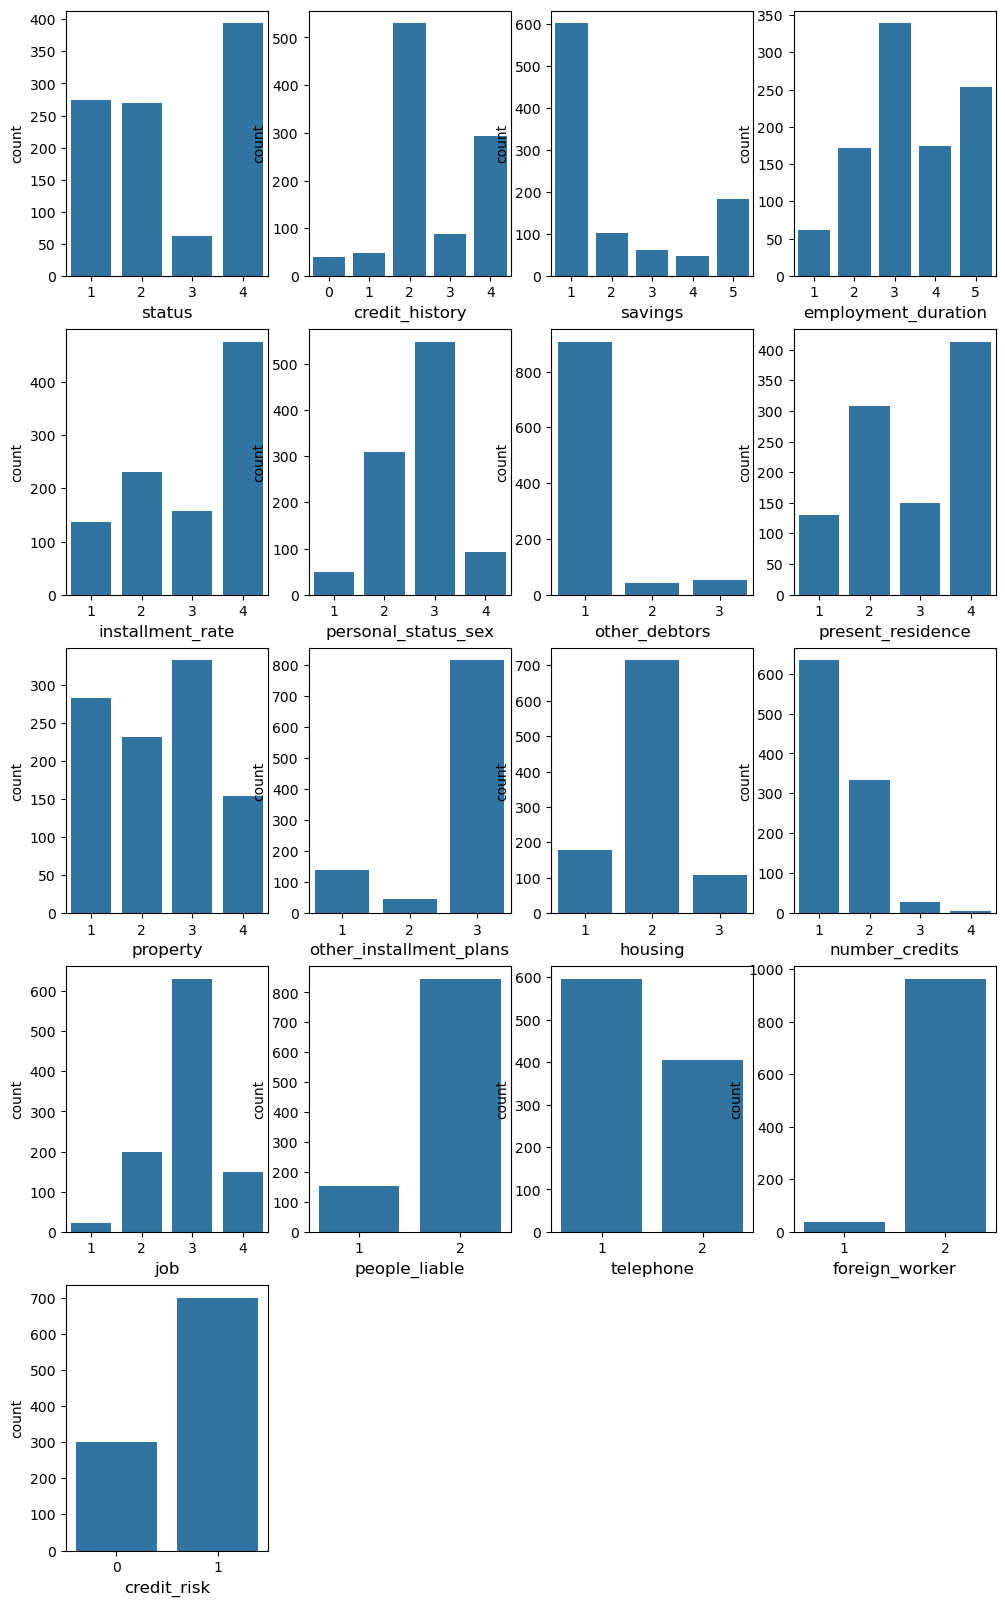

In [31]:
# Create count plot for each discrete variable
plt.figure(figsize=(12,20)) 
for i in discrete_variable:
    # There Are 17 Feature In Discrete Variable
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=data[discrete_variable])
        plt.xlabel(i,fontsize=12)
    plotnumber += 1
   
plt.show()


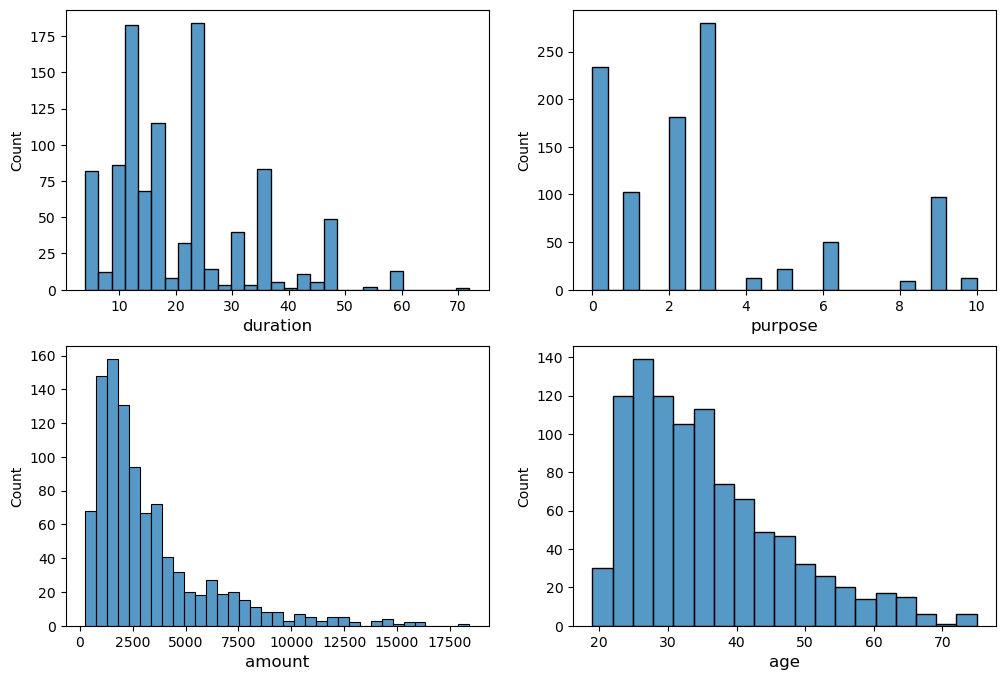

In [44]:
plt.figure(figsize=(12, 8)) 
plotnumber = 1  # Reset the plot counter

# # Create count plot for each continous variable
for i in continous_variable:
    # Create up to 4 subplots (2 rows, 2 columns)
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.histplot(data=data, x=i)
        plt.xlabel(i, fontsize=12)
    plotnumber += 1

plt.show()


In [34]:
import yaml

with open(r'../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

In [41]:
# Prints the path or filename specified for 'dataset_csv'
print(config['data_load']['dataset_csv'])

./data/Preprocess.csv


In [42]:
# Save the DataFrame 'data' to a CSV file
data.to_csv(config['data_load']['dataset_csv'], index=False)